In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import sys, os
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
import time
from src.rocket import Rocket, perturb_rocket
from src.pos_rocket_vis import *

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir,"rocket.yaml")

# Rocket setup
Ts  = 1/20
rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
rocket.mass = 1.7 # Do not change!!!

# Visualization setup
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1

In [3]:
sim_time = 15 # simulation length in seconds

omega_x0 = 0; omega_y0 = 0; omega_z0 = 0; alpha0 = 0; beta0 = 0; gamma0 = np.deg2rad(30); v_x0 = 0; v_y0 = 0; v_z0 = 0; p_x0 = 3; p_y0 = 2; p_z0 = 10
x0 = np.array([omega_x0, omega_y0, omega_z0, alpha0, beta0, gamma0, v_x0, v_y0, v_z0, p_x0, p_y0, p_z0])

omega_x_target = 0; omega_y_target = 0; omega_z_target = 0; alpha_target = 0; beta_target = 0; gamma_target = 0; v_x_target = 0; v_y_target = 0; v_z_target = 0; p_x_target = 1; p_y_target = 0; p_z_target = 3; 
x_target = np.array([omega_x_target, omega_y_target, omega_z_target, alpha_target, beta_target, gamma_target, v_x_target, v_y_target, v_z_target, p_x_target, p_y_target, p_z_target]) 

xs, us = rocket.trim(x_target)
print("Linearization around a steady state:")
print("x_ref = ", x_target)
print("xs = ", xs)
print("us = ", us)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Linearization around a steady state:
x_ref =  [0 0 0 0 0 0 0 0 0 1 0 3]
xs =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
us =  [ 0.          0.         56.66666667  0.        ]


In [4]:
from MPCLandControl_D6_2 import MPCLandControl
# MPC parameters
H = 8
# Merge four linear mpc
mpc = MPCLandControl().new_controller(rocket, Ts, H, x_ref=x_target)

Subsystem x: 

Input upper bounds are [0.26179939]
Input lower bounds are [-0.26179939]
State upper bounds are [       inf 0.17453293        inf        inf]
State lower bounds are [       -inf -0.17453293        -inf        -inf] 

Subsystem y: 

Input upper bounds are [0.26179939]
Input lower bounds are [-0.26179939]
State upper bounds are [       inf 0.17453293        inf        inf]
State lower bounds are [       -inf -0.17453293        -inf        -inf] 

Subsystem z: 

Input upper bounds are [80.]
Input lower bounds are [40.]
State upper bounds are [inf inf]
State lower bounds are [-inf   0.] 

Min invariant set stopping criterion : 0.01
A = [[1.   0.  ]
 [0.05 1.  ]]
B = [[0.00865235]
 [0.00021631]]
K = [[ -82.28975457 -360.59555374]]
Closed-loop control eigenvalues: [0.6  0.61]
||A+BK||^1 = 3.264336650642937
Not yet convgerged at iteration 1
||A+BK||^2 = 3.8489841422072493
Not yet convgerged at iteration 2
||A+BK||^3 = 3.475554733103938
Not yet convgerged at iteration 3
||A+BK||

Simulating time 0.00

 State alpha violation: 0.21 > 0.17, 
 State alpha violation: 0.25 > 0.17, 
 State alpha violation: 0.26 > 0.17, 
 State beta violation: -0.19 < -0.17, 
 State alpha violation: 0.26 > 0.17, 
 State beta violation: -0.21 < -0.17, 
 State alpha violation: 0.25 > 0.17, 
 State beta violation: -0.23 < -0.17, 
 State alpha violation: 0.23 > 0.17, 
 State beta violation: -0.23 < -0.17, 
 State alpha violation: 0.21 > 0.17, 
 State beta violation: -0.22 < -0.17, 
 State alpha violation: 0.19 > 0.17, 

c:\Users\vince\anaconda3\envs\mpc2025\Lib\site-packages\cvxpy\problems\problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(



 State beta violation: -0.21 < -0.17, 
 State alpha violation: 0.18 > 0.17, 
 State beta violation: -0.20 < -0.17, 
 State beta violation: -0.20 < -0.17, 
 State beta violation: -0.19 < -0.17, 
 State beta violation: -0.18 < -0.17, 
 State beta violation: -0.18 < -0.17, Simulating time 1.00
Simulating time 2.00
Simulating time 3.00
Simulating time 4.00
Simulating time 5.00
Simulating time 6.00
Simulating time 7.00
Simulating time 8.00
Simulating time 9.00
Simulating time 10.00
Simulating time 11.00
Simulating time 12.00
Simulating time 13.00
Simulating time 14.00


AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=299, step=2), IntSlider(value=0…

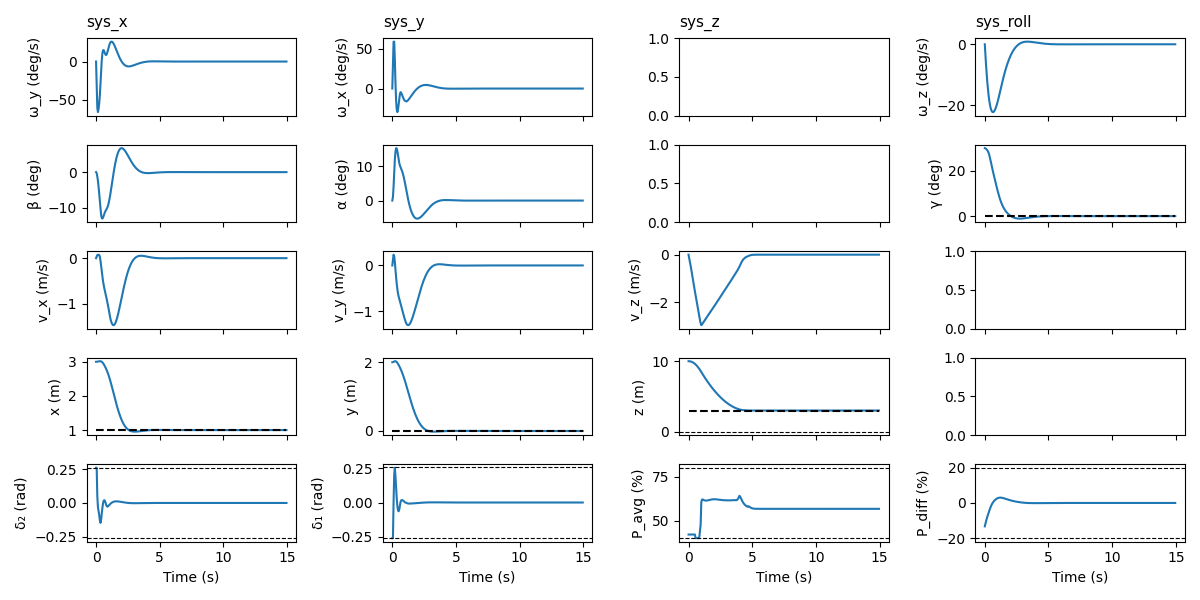

In [5]:
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol = rocket.simulate_land(mpc, sim_time, H, x0)
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl, T_ol=t_ol[...,:-1], X_ol=x_ol, U_ol=u_ol)
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, xs)